### what do we want in a box score?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob
from collections import Counter

In [99]:
ls

README.md  figs/      library/   notebooks/


In [100]:
cd 'blueprint-stats'

[Errno 2] No such file or directory: 'blueprint-stats'
/Users/maxcohen/Documents/blueprint-stats


### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [5]:
#give file path abbreviation
poss_path_abbr = 'library/possessions/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [6]:
#give file path abbreviation
passes_path_abbr = 'library/passes/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

### MERGE THE PASSES_DF WITH THE POSS_DF

In [7]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])
full_poss_df.to_csv('library/possessions/BP_2019_Full_Possession_Data.csv')

In [8]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [103]:
full_poss_df.head()

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index,y_bucket
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.791, 0.818]"
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.764, 0.791]"
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.736, 0.764]"
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.682, 0.709]"
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.627, 0.655]"


In [10]:
full_poss_df['opponent'].unique()

array(['Lost  Boys', 'HIP', 'Vault', 'Big Wrench', 'Citywide', 'Shade',
       'Red Circus', 'El Nino', 'Floodwall', 'Lantern'], dtype=object)

In [11]:
opponent_grp = full_poss_df.groupby(['opponent'])

In [12]:
opponent_grp.get_group('Citywide')

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
494,2020-02-17 15:52:29,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
495,2020-02-17 15:52:33,2,1,Owen Marschall,Evan Ma,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
496,2020-02-17 15:52:41,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
497,2020-02-17 15:52:50,2,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
498,2020-02-17 15:52:54,2,1,Max Cohen,Ian McInerney,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2020-02-17 16:24:23,19,1,Victor Kao,Nadav Pearl,0,0,0,0,0,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
579,2020-02-17 16:24:27,19,1,Nadav Pearl,Josh Imhoff,0,0,0,1,1,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
580,2020-02-17 16:25:52,20,1,Ruozhou Ye,Jesse Gan,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN
581,2020-02-17 16:25:54,20,1,Jesse Gan,Geo Zheng,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN


In [13]:
opponent_grp['Receiver'].value_counts(normalize=True).head(300).loc['Red Circus']

Receiver
Victor Kao        0.179487
Max Cohen         0.170940
Carter Thallon    0.102564
Eliot Bemis       0.076923
Sam Pollack       0.076923
Jeff Voss         0.051282
Owen Marschall    0.051282
Andrew Edelman    0.042735
Geo Zheng         0.042735
Gabe Stump        0.034188
Odie              0.034188
Ruozhou Ye        0.025641
Sam Feder         0.025641
Carter Wang       0.017094
Jon Kwan          0.017094
Towell            0.017094
Ian McInerney     0.008547
Josh Imhoff       0.008547
Stouf             0.008547
Swan              0.008547
Name: Receiver, dtype: float64

In [14]:
opponent_grp['Passes'].agg(['median','mean']).loc['Citywide']

median    8.000000
mean      8.573034
Name: Citywide, dtype: float64

### chart the number of passes per possession and scoring rate

In [15]:
for x in full_poss_df.index:
    full_poss_df.loc[x,'possession_index'] = full_poss_df.loc[x,'opponent'] + ' | ' + \
    str(full_poss_df.loc[x,'Point']) + '.' + \
    str(full_poss_df.loc[x,'Possession'])

In [16]:
unique_poss_df = full_poss_df.drop_duplicates(['possession_index','Passes'])

In [17]:
unique_poss_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
7,2020-02-26 22:58:06,2,1,Andrew Edelman,Josh Imhoff,0,0,0,0,0,...,1,Andrew Edelman,2,Andrew Edelman,Josh Imhoff,Sam Alston,NaN,NaN,NaN,Lost Boys | 2.1
9,2020-02-26 22:59:21,3,1,Andrew Edelman,Geo Zheng,0,0,0,0,0,...,0,Andrew Edelman,5,NaN,NaN,NaN,Stouf,NaN,NaN,Lost Boys | 3.1
14,2020-02-26 23:00:22,3,2,Andrew Edelman,Towell,0,0,0,0,0,...,0,Andrew Edelman,3,NaN,NaN,NaN,Andrew Edelman,NaN,NaN,Lost Boys | 3.2
17,2020-02-26 23:08:14,4,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,Evan Ma,6,NaN,NaN,NaN,Evan Ma,NaN,NaN,Lost Boys | 4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2020-02-18 18:56:30,10,1,Max Cohen,Carter Thallon,0,0,0,0,0,...,0,Max Cohen,6,NaN,NaN,NaN,Jeff Voss,NaN,NaN,Lantern | 10.1
1146,2020-02-18 18:57:27,10,2,Geo Zheng,Max Cohen,0,0,0,0,0,...,1,Geo Zheng,7,Jeff Voss,Carter Thallon,Sam Pollack,NaN,NaN,NaN,Lantern | 10.2
1153,2020-02-18 18:59:11,12,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,0,Owen Marschall,4,NaN,NaN,NaN,Odie,NaN,NaN,Lantern | 12.1
1157,2020-02-18 19:00:03,12,2,Max Cohen,Odie,0,0,0,1,1,...,1,Max Cohen,1,NaN,Max Cohen,Odie,NaN,NaN,NaN,Lantern | 12.2


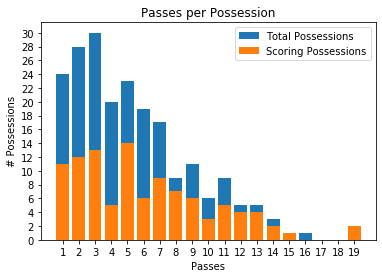

In [18]:
#create passes per possession bar chart

pass_count_list = sorted(unique_poss_df['Passes'])
c = Counter(pass_count_list)
plt.bar(c.keys(),c.values(),label='Total Possessions')

score_unique_poss_df = unique_poss_df[unique_poss_df['Scored?'] == 1]
score_pass_count_list = sorted(score_unique_poss_df['Passes'])
d = Counter(score_pass_count_list)
plt.bar(d.keys(),d.values(),label='Scoring Possessions')

plt.xticks(np.arange(1,max(sorted(np.unique(pass_count_list)))+1))
plt.yticks(np.arange(max(c.values())+1,step=2))
plt.xlabel('Passes')
plt.ylabel('# Possessions')
plt.title('Passes per Possession')
plt.legend()
plt.savefig('figs/passes_per_possession.png', dpi=300)
plt.show()

In [19]:
most_passes = full_poss_df['Passes'].max()
full_poss_df[full_poss_df['Passes'] == most_passes]

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
868,2020-02-27 22:02:48,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
869,2020-02-27 22:02:54,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
870,2020-02-27 22:02:59,9,1,Victor Kao,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
871,2020-02-27 22:03:04,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
872,2020-02-27 22:03:09,9,1,Victor Kao,Ian McInerney,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
873,2020-02-27 22:03:15,9,1,Ian McInerney,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
874,2020-02-27 22:03:23,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
875,2020-02-27 22:03:26,9,1,Victor Kao,Evan Ma,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
876,2020-02-27 22:03:43,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
877,2020-02-27 22:03:48,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1


### chart all throws on the field

In [20]:
turnover_df = full_poss_df[full_poss_df['Thrower error?'] == 1]

In [21]:
assist_df = full_poss_df[full_poss_df['Assist?'] == 1]

In [22]:
just_throw_df = full_poss_df[(full_poss_df['Assist?'] == 0) & (full_poss_df['Thrower error?'] == 0)]

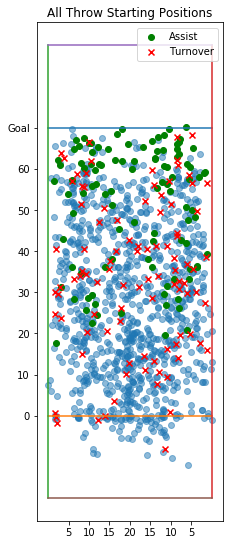

In [74]:
#scatter plot of all throwing positions
fig = plt.figure(figsize=(4/1.2,11/1.2))

#all normal throws
plt.scatter(just_throw_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-just_throw_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=.5)

#assists
plt.scatter(assist_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=1,
            c='g',
            label='Assist')

#turnovers
plt.scatter(turnover_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-turnover_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=1,
            marker='x',
            c='r',
            label='Turnover')

#attacking endzone line
x1 = [0,1]
y1 = [.8181818,.8181818]
plt.plot(x1,y1)

#defending endzone line
x2 = [0,1]
y2 = [.1818181,.1818181]
plt.plot(x2,y2)

#backhand sideline
x3 = [0,0]
y3 = [0,1]
plt.plot(x3,y3)

#flick sideline
x4 = [1,1]
y4 = [0,1]
plt.plot(x4,y4)

#attacking backline
x5 = [0,1]
y5 = [1,1]
plt.plot(x5,y5)

#defending backline
x6 = [0,1]
y6 = [0,0]
plt.plot(x6,y6)

xtick = .25/2
ytick = .181818/2

plt.xticks(ticks=[xtick,xtick*2,xtick*3,xtick*4,xtick*5,xtick*6,xtick*7],
          labels=[5,10,15,20,15,10,5])
plt.yticks(ticks=[ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9],
          labels=[0,10,20,30,40,50,60,'Goal'])
#plt.xlabel()
#plt.ylabel()
plt.legend(loc='upper right')
plt.title('All Throw Starting Positions')

plt.show()
fig.savefig('figs/throw_start_scatter.png',dpi=300,bbox_inches='tight')

### Scoring percent by vertical position on field

In [ ]:
#create chart that shows scoring probbality of scoring based on distance from the attacking endzone

In [25]:
#create bins every two yards
bin_list = []
yardage = 3
for x in range(-3,109,yardage):
    bin_list.append(x + yardage)
    
bins = np.array(bin_list)

In [26]:
#change bins to 0->1 range
bins = [x/110 for x in bins]
bins

[0.0,
 0.02727272727272727,
 0.05454545454545454,
 0.08181818181818182,
 0.10909090909090909,
 0.13636363636363635,
 0.16363636363636364,
 0.19090909090909092,
 0.21818181818181817,
 0.24545454545454545,
 0.2727272727272727,
 0.3,
 0.32727272727272727,
 0.35454545454545455,
 0.38181818181818183,
 0.4090909090909091,
 0.43636363636363634,
 0.4636363636363636,
 0.4909090909090909,
 0.5181818181818182,
 0.5454545454545454,
 0.5727272727272728,
 0.6,
 0.6272727272727273,
 0.6545454545454545,
 0.6818181818181818,
 0.7090909090909091,
 0.7363636363636363,
 0.7636363636363637,
 0.7909090909090909,
 0.8181818181818182,
 0.8454545454545455,
 0.8727272727272727,
 0.9,
 0.9272727272727272,
 0.9545454545454546,
 0.9818181818181818,
 1.009090909090909]

In [27]:
full_poss_df['y_bucket'] = pd.cut(full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
                              bins)
full_poss_df['y_bucket']

0       (0.791, 0.818]
1       (0.764, 0.791]
2       (0.736, 0.764]
3       (0.682, 0.709]
4       (0.627, 0.655]
             ...      
1158    (0.709, 0.736]
1159    (0.655, 0.682]
1160    (0.545, 0.573]
1161    (0.409, 0.436]
1162    (0.245, 0.273]
Name: y_bucket, Length: 1163, dtype: category
Categories (37, interval[float64]): [(0.0, 0.0273] < (0.0273, 0.0545] < (0.0545, 0.0818] < (0.0818, 0.109] ... (0.9, 0.927] < (0.927, 0.955] < (0.955, 0.982] < (0.982, 1.009]]

In [28]:
all_hist = np.histogram(1-full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],bins)
len(all_hist[0])

37

In [29]:
scored_df = full_poss_df[full_poss_df['Scored?'] == 1]

In [30]:
scored_hist = np.histogram(1-scored_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],bins)
len(scored_hist[0])

37

In [31]:
all_y = all_hist[0]
scored_y = scored_hist[0]
bins_data = bins[:-1]
d = {'all_y':all_y, 'scored_y':scored_y, 'bins':bins_data}
y_score_df = pd.DataFrame(data = d)

In [32]:
bins[:-1]

[0.0,
 0.02727272727272727,
 0.05454545454545454,
 0.08181818181818182,
 0.10909090909090909,
 0.13636363636363635,
 0.16363636363636364,
 0.19090909090909092,
 0.21818181818181817,
 0.24545454545454545,
 0.2727272727272727,
 0.3,
 0.32727272727272727,
 0.35454545454545455,
 0.38181818181818183,
 0.4090909090909091,
 0.43636363636363634,
 0.4636363636363636,
 0.4909090909090909,
 0.5181818181818182,
 0.5454545454545454,
 0.5727272727272728,
 0.6,
 0.6272727272727273,
 0.6545454545454545,
 0.6818181818181818,
 0.7090909090909091,
 0.7363636363636363,
 0.7636363636363637,
 0.7909090909090909,
 0.8181818181818182,
 0.8454545454545455,
 0.8727272727272727,
 0.9,
 0.9272727272727272,
 0.9545454545454546,
 0.9818181818181818]

In [33]:
y_score_df['conversion_rate'] = y_score_df['scored_y'] / y_score_df['all_y']

In [34]:
y_score_df['yards'] = y_score_df.index * yardage
y_score_df['yards']

0       0
1       3
2       6
3       9
4      12
5      15
6      18
7      21
8      24
9      27
10     30
11     33
12     36
13     39
14     42
15     45
16     48
17     51
18     54
19     57
20     60
21     63
22     66
23     69
24     72
25     75
26     78
27     81
28     84
29     87
30     90
31     93
32     96
33     99
34    102
35    105
36    108
Name: yards, dtype: int64

In [35]:
y_score_df = y_score_df.dropna()
y_score_df = y_score_df[y_score_df['all_y'] > 10]
y_score_df

,all_y,scored_y,bins,conversion_rate,yards
5,16,9,0.136364,0.562500,15
6,61,21,0.163636,0.344262,18
7,38,15,0.190909,0.394737,21
8,32,16,0.218182,0.500000,24
9,57,22,0.245455,0.385965,27
10,45,24,0.272727,0.533333,30
11,58,26,0.300000,0.448276,33
12,65,31,0.327273,0.476923,36
13,57,32,0.354545,0.561404,39
14,55,32,0.381818,0.581818,42


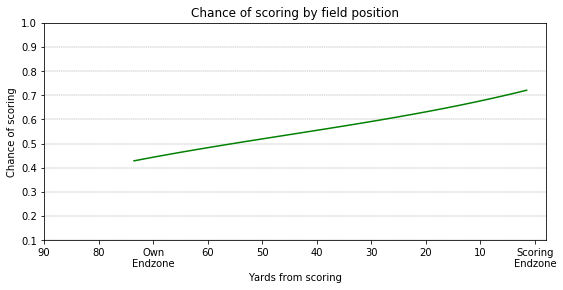

In [197]:
#by vertical position on the field
#chance of scoring by field position
fig = plt.figure(figsize=(9,4))

x = y_score_df['yards']+(.5*yardage)#<-center the point in the middle of the bin
y = y_score_df['conversion_rate']
#s = y_score_df['all_y']
#plt.scatter(x,y,s=s)

z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"g")

xtick = 10
ytick = .1

plt.xticks(ticks=[xtick*9,xtick*8,xtick*7,xtick*6,xtick*5,xtick*4,xtick*3,xtick*2,xtick*1,xtick*0],
          labels=[90,80,'Own\nEndzone',60,50,40,30,20,10,'Scoring\nEndzone'][::-1])
plt.yticks(ticks=[ytick,ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9,ytick*10])
plt.xlabel('Yards from scoring')
plt.ylabel('Chance of scoring')
#plt.legend(loc='upper right')
plt.title('Chance of scoring by field position')

plt.grid(which='major', axis='y' ,linestyle='-.', linewidth='.2', color='black')
plt.show()
fig.savefig('figs/chance_score_field_position.png',dpi=300, 
            bbox_inches= 'tight')

### Scoring percent by horizontal position on field

In [ ]:
#create chart that shows scoring probbality of scoring based on horizontal position on field

In [165]:
#create bins every two yards
ho_bin_list = [0]
ho_yardage = 2
for x in range(0,40,ho_yardage):
    ho_bin_list.append(x + ho_yardage)
    
ho_bins = np.array(ho_bin_list)

In [166]:
#change bins to 0->1 range
ho_bins = [x/40 for x in ho_bins]
ho_bins

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [167]:
full_poss_df['x_bucket'] = pd.cut(full_poss_df['Start X (0 -> 1 = left sideline -> right sideline)'],
                              ho_bins)
full_poss_df['x_bucket']

0       (0.25, 0.3]
1       (0.5, 0.55]
2       (0.35, 0.4]
3       (0.7, 0.75]
4       (0.5, 0.55]
           ...     
1158    (0.25, 0.3]
1159    (0.55, 0.6]
1160    (0.85, 0.9]
1161    (0.9, 0.95]
1162    (0.8, 0.85]
Name: x_bucket, Length: 1163, dtype: category
Categories (20, interval[float64]): [(0.0, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.8, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]]

In [168]:
ho_all_hist = np.histogram(full_poss_df['Start X (0 -> 1 = left sideline -> right sideline)'],ho_bins)
len(ho_all_hist[0])

20

In [169]:
scored_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index,y_bucket
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.791, 0.818]"
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.764, 0.791]"
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.736, 0.764]"
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.682, 0.709]"
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.627, 0.655]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2020-02-18 19:01:10,14,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.709, 0.736]"
1159,2020-02-18 19:01:19,14,1,Max Cohen,Sam Pollack,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.655, 0.682]"
1160,2020-02-18 19:01:25,14,1,Sam Pollack,Jeff Voss,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.545, 0.573]"
1161,2020-02-18 19:01:29,14,1,Jeff Voss,Carter Thallon,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.409, 0.436]"


In [170]:
ho_scored_hist = np.histogram(scored_df['Start X (0 -> 1 = left sideline -> right sideline)'],ho_bins)
len(ho_scored_hist[0])

20

In [171]:
all_x = ho_all_hist[0]
scored_x = ho_scored_hist[0]
ho_bins_data = ho_bins[:-1]
ho_d = {'all_x':all_x, 'scored_x':scored_x, 'bins':ho_bins_data}
x_score_df = pd.DataFrame(data = ho_d)

In [172]:
ho_bins[:-1]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [173]:
x_score_df['conversion_rate'] = x_score_df['scored_x'] / x_score_df['all_x']

In [174]:
x_score_df['yards'] = x_score_df.index * ho_yardage
x_score_df['yards']

0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
11    22
12    24
13    26
14    28
15    30
16    32
17    34
18    36
19    38
Name: yards, dtype: int64

In [175]:
x_score_df = x_score_df.dropna()
x_score_df = x_score_df[x_score_df['all_x'] > 10]
x_score_df

,all_x,scored_x,bins,conversion_rate,yards
0,24,11,0.00,0.458333,0
1,33,18,0.05,0.545455,2
2,41,18,0.10,0.439024,4
3,71,42,0.15,0.591549,6
4,85,47,0.20,0.552941,8
5,61,45,0.25,0.737705,10
6,45,23,0.30,0.511111,12
7,54,27,0.35,0.500000,14
8,63,31,0.40,0.492063,16
9,88,51,0.45,0.579545,18


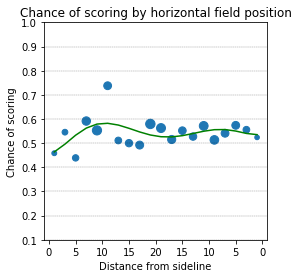

In [208]:
#by horizontal position on the field
#chance of scoring by field position
fig = plt.figure(figsize=(4,4))

x = x_score_df['yards']+(.5*ho_yardage)#<-center the point in the middle of the bin
y = x_score_df['conversion_rate']
s = x_score_df['all_x']
plt.scatter(x,y,s)

z = np.polyfit(x, y, 6)
p = np.poly1d(z)
plt.plot(x,p(x),"g")

xtick = 5
ytick = .1

plt.xticks(ticks=[xtick*8,xtick*7,xtick*6,xtick*5,xtick*4,xtick*3,xtick*2,xtick*1,xtick*0],
          labels=[0,5,10,15,20,15,10,5,0])
plt.yticks(ticks=[ytick,ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9,ytick*10])
plt.xlabel('Distance from sideline')
plt.ylabel('Chance of scoring')
#plt.legend(loc='upper right')
plt.title('Chance of scoring by horizontal field position')

plt.grid(which='major', axis='y' ,linestyle='-.', linewidth='.2', color='black')
plt.show()
fig.savefig('figs/chance_score_HORIZONTAL_field_position.png',dpi=300, 
            bbox_inches= 'tight')

In [105]:
full_poss_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index,y_bucket
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.791, 0.818]"
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.764, 0.791]"
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.736, 0.764]"
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.682, 0.709]"
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1,"(0.627, 0.655]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2020-02-18 19:01:10,14,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.709, 0.736]"
1159,2020-02-18 19:01:19,14,1,Max Cohen,Sam Pollack,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.655, 0.682]"
1160,2020-02-18 19:01:25,14,1,Sam Pollack,Jeff Voss,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.545, 0.573]"
1161,2020-02-18 19:01:29,14,1,Jeff Voss,Carter Thallon,0,0,0,0,0,...,Owen Marschall,5,Jeff Voss,Carter Thallon,Odie,NaN,NaN,NaN,Lantern | 14.1,"(0.409, 0.436]"


In [108]:
full_poss_df[(full_poss_df['Thrower error?'] == 1) & (full_poss_df['Receiver error?'] == 1)]

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index,y_bucket
78,2020-02-26 23:22:25,11,2,Odie,Owen Marschall,1,1,1,1,0,...,Evan Ma,16,NaN,NaN,NaN,Odie,Owen Marschall,NaN,Lost Boys | 11.2,"(0.191, 0.218]"
112,2020-02-26 23:30:25,14,2,Eliot Bemis,Jesse Gan,1,1,1,1,0,...,Ruozhou Ye,6,NaN,NaN,NaN,Eliot Bemis,Jesse Gan,NaN,Lost Boys | 14.2,"(0.491, 0.518]"
370,2020-02-18 22:21:07,1,4,Max Cohen,Sam Pollack,1,1,1,0,0,...,Victor Kao,2,NaN,NaN,NaN,Max Cohen,Sam Pollack,NaN,Big Wrench | 1.4,"(0.491, 0.518]"
415,2020-02-18 22:36:29,8,1,Max Cohen,Owen Marschall,1,1,1,1,0,...,Owen Marschall,7,NaN,NaN,NaN,Max Cohen,Owen Marschall,NaN,Big Wrench | 8.1,"(0.245, 0.273]"
426,2020-02-18 22:41:01,10,1,Evan Ma,Ruozhou Ye,1,1,1,0,0,...,Ruozhou Ye,2,NaN,NaN,NaN,Evan Ma,Ruozhou Ye,NaN,Big Wrench | 10.1,"(0.736, 0.764]"
428,2020-02-18 22:42:06,11,1,Carter Thallon,Odie,1,1,1,1,0,...,Max Cohen,2,NaN,NaN,NaN,Carter Thallon,Odie,NaN,Big Wrench | 11.1,"(0.491, 0.518]"
657,2020-02-25 09:12:56,16,2,Max Cohen,Eliot Bemis,1,1,1,0,0,...,Max Cohen,1,NaN,NaN,NaN,Max Cohen,Eliot Bemis,NaN,Shade | 16.2,"(0.655, 0.682]"
760,2020-02-17 23:06:23,10,1,Sam Feder,Stouf,1,1,1,0,0,...,Ruozhou Ye,5,NaN,NaN,NaN,Sam Feder,Stouf,NaN,Red Circus | 10.1,"(0.355, 0.382]"
859,2020-02-27 22:00:06,7,1,Andrew Edelman,Ruozhou Ye,1,1,1,1,0,...,Alon Brown,6,NaN,NaN,NaN,Andrew Edelman,Ruozhou Ye,NaN,El Nino | 7.1,"(0.655, 0.682]"
944,2020-02-27 22:22:07,18,1,Carter Thallon,Odie,1,1,1,0,0,...,NaN,4,NaN,NaN,NaN,Carter Thallon,Odie,NaN,El Nino | 18.1,"(0.518, 0.545]"


In [109]:
full_poss_df['Turnover?'].sum()

109

In [110]:
full_poss_df['Thrower error?'].sum() + full_poss_df['Receiver error?'].sum()

122

### everything below here is just leftover remnants of some other ideas

### ADD ALL GAMES DF

games_file = 'Blueprint 2019 Games.csv'
games_df = pd.read_csv(games_file)
games_df

### DETERMINE D TO O RATIOS 

In [ ]:
#this was a brief attempt to figure out how to balance the stats of defensive players

#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#we can combine the passes and possessions dfs 
passes_df.columns.intersection(poss_df.columns)

full_poss_df.columns

#how many more yards are GAINED on o points than d points
o_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

#how many more yards are TOTAL THROWN on o points than d points
o_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

mult_d_total = ((o_dist_total + d_dist_total) / 2) / d_dist_total
mult_o_total = ((o_dist_total + d_dist_total) / 2) / o_dist_total

mult_d_gain = ((o_dist_gain / d_dist_gain) / 2) / d_dist_gain
mult_o_gain = ((o_dist_gain / d_dist_gain) / 2) / o_dist_gain

#find o to d pp ratio
player_stats_df['o_d_pp_ratio'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

o_pp_ratio = player_stats_df.loc[0,'o_d_pp_ratio']

player_stats_df.loc[0,'Total completed throw distance (m)']

o_pp_ratio * abs(1-mult_d_total)